In [541]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [542]:
#Constants
a=1e-9
w=0.8
v=0.024
K=1e4
rho=0.0038
tau=30
beta=100
gamma=0.01
t_start=0
t_end=100000


In [543]:
#Initial state of system
B_init=5e5
I_init=0
P_init=1e6
S_init=100
initialState=[B_init,I_init,P_init,S_init]


In [544]:
#ODE model for chemostat
def odeModel(t,y):
    B,I,P,S=y
    B_dot=v*B*(S/(S+K)) - B*(rho+a*w*P)
    I_dot=a*w*B*P - I*(rho + 1/tau)
    P_dot=-P*(rho + a*(B+I)) + beta*(I/tau)
    S_dot=rho*(resourceFlow()-S) - gamma*v*B*(S/(S+K))

    return [B_dot,I_dot,P_dot,S_dot]

#returns resource flow to chemostat
def resourceFlow():
    return 1e4

solution = solve_ivp(odeModel,[t_start,t_end],initialState,method='RK45',t_eval=np.linspace(t_start, t_end, 8000))

C:\Users\fredr\AppData\Local\Temp\ipykernel_11408\3257789165.py:7: RuntimeWarning: divide by zero encountered in log10
  logI=np.log10(I_sol)


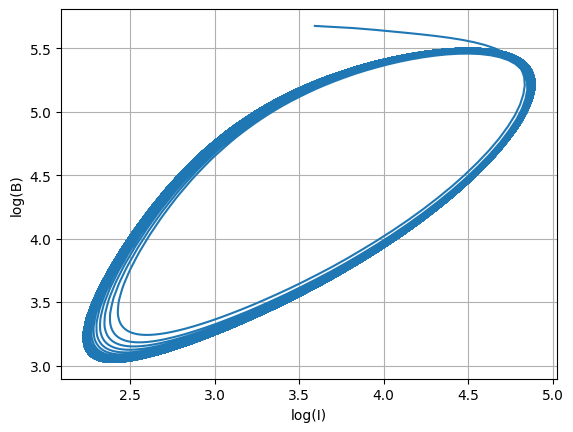

In [545]:

B_sol=solution.y[0]
I_sol=solution.y[1]
P_sol=solution.y[2]
S_sol=solution.y[3]

logB=np.log10(B_sol)
logI=np.log10(I_sol)
logP=np.log10(P_sol)
logS=np.log10(S_sol)
plt.plot(logI,logB)
plt.ylabel("log(B)")
plt.xlabel("log(I)")
plt.grid()
plt.show()

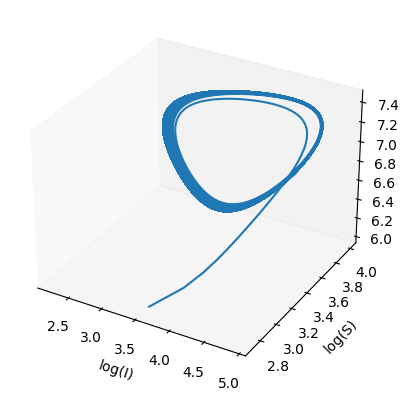

In [546]:
ax = plt.axes(projection='3d')
ax.plot3D(logI,logS,logP)
ax.set_xlabel("log(I)")
ax.set_ylabel("log(S)")
ax.grid(False)
plt.show()